# BioImagePy: runner or process execution

This tutorial descibe the use of the **Runner** class to run a process. A process runable with the **Runner** class is a command line tool descibed by a *XML* file. The structure and content of a process *XML* file is not detailled in this tutorial. Please refer to the **BioImageIT** project documentation or to the **Galaxy Project** wrapper documentation to know more about *XML* process file or wrappers.

In this tutorial, we assume that we have the process `sdeconv2d` available. What we call a process here is a executable program and it associated *XML* wrapper.


## Setup the process

In [1]:
import sys

# this is an optional command to link BioImagePy from local directory
sys.path.append("../bioimageit_core") # Change this path to the bioimagepy directory or remove it if using conda ot pip

# initialize the configuration
from bioimageit_core.config import ConfigAccess
ConfigAccess("./config.json")

To run a process you need first to instantiate a **Process**. A **Process** is a class than contains all the matadata of the process. 
As it is tedious to instantiate a **Process** with the path of the XML file, **BioImageIT** provides a ``ProcessAccess`` class that manage an *XML wrappers* database. A process can than be instantiate by it fullname (ie name plus version)

In [2]:
from bioimageit_core.process import ProcessAccess, Process

# show the list of all available processes
processAccess = ProcessAccess()
processAccess.search()

 ndsafir_v3.0.0	        ndsafir	          3.0.0	     sequential	/Users/sprigent/Documents/code/bioimageit/toolboxes/tools/serpico-ndsafir/ndsafir.xml
sampletool_v0.1.0	     SampleTool	          0.1.0	     sequential	/Users/sprigent/Documents/code/bioimageit/toolboxes/tools/sampletool/tools/sampletool.xml
fiji-stackreg_v1.0.0	 fiji stack reg	          1.0.0	     sequential	/Users/sprigent/Documents/code/bioimageit/toolboxes/tools/fiji/tools/registration/stackreg.xml
image-math_v1.0.0	fiji image math	          1.0.0	     sequential	/Users/sprigent/Documents/code/bioimageit/toolboxes/tools/fiji/tools/manipulation/image_math.xml
image-calculator_v1.0.0	fiji image calculator	          1.0.0	     sequential	/Users/sprigent/Documents/code/bioimageit/toolboxes/tools/fiji/tools/manipulation/image_calculator.xml
zproject_v1.0.0	  fiji zproject	          1.0.0	     sequential	/Users/sprigent/Documents/code/bioimageit/toolboxes/tools/fiji/tools/manipulation/zproject.xml
fiji-invert_v1.0.0	    fiji

In [3]:
# get the svdeconv2d process
process = ProcessAccess().get('sdeconv2d_v0.1.0')
if process:
    process.man()
else:
    print("Process not found")    

SPARTION 2D : 
	              i	               	    Input Image
	          sigma	              3	          Sigma
	 regularization	              7	 Regularization
	      weighting	            0.6	      Weighting
	         method	            HSV	         Method
	  normalization	             L2	  Normalization
	              o	               	 Denoised image


## Setup the runner

Now we can instantiate the runner with the process

In [4]:
from bioimageit_core.runner import Runner

runner = Runner(process)
runner.man()

SPARTION 2D : 
	              i	               	    Input Image
	          sigma	              3	          Sigma
	 regularization	              7	 Regularization
	      weighting	            0.6	      Weighting
	         method	            HSV	         Method
	  normalization	             L2	  Normalization
	              o	               	 Denoised image


The `man()` method prints a man page that describe the process. Thus we need to execute the `svdeconv` process with four parameters.

## Execute on files with exec()

To execute the process we simply run the method exec with the parameters descibed in the `man()` method of the process:

In [5]:
import imageio

runner.exec('i', 'synthetic_data/data/population1_001.tif', 
            'o', 'population1_001_deconv.tif', 
            'sigma', 2,
            'regularization', 2, 
            'weighting', 0.1,
            'normalization', 'max',
            'method', 'SV') 

myoutput = imageio.imread('population1_001_deconv.tif')

Lets visualize the output:

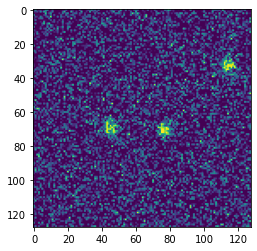

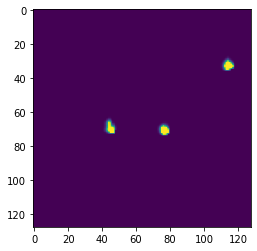

In [6]:
import matplotlib.pyplot as plt

plt.figure(1)                      
plt.imshow(imageio.imread('synthetic_data/data/population1_001.tif'))
plt.figure(2)
plt.imshow(myoutput)
plt.show()

This `exec()` method works on data files. This has the advantage that data are not loaded into python variables but sent directly to the external process. 

## Wrapping up

In this short tutorial, we saw the usage of the **Runner** and **Process** classes. Basically we need to know 2 methods
1. `man`: to get the list of the process I/O and parameters
2. `exec`: to execute the process on files

This **Runner** class is a single data level processing and does not generate any metadata. To run a process on an experiment dataset and have automatically generated metadata, we use the **Pipeline** class in the next tutorial